In [1]:
# Import packages
import matplotlib.pyplot as plt
from looper import *
import pandas as pd
import numpy as np
% matplotlib inline

In [2]:
import plotly
print plotly.__version__            # version 1.9.4 required
plotly.offline.init_notebook_mode() # run at the start of every notebook

import plotly.plotly as py
import plotly.graph_objs as go


1.9.10


In [3]:
input_csv = './mouse_malaria_survivors.csv'

# Read input dataset
df_input = pd.read_csv(input_csv, header=None)
df_input.head()

/Users/PoonamRath/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning:

Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.



0           1             2            3            4           5   \
0       NaN           1             2            3            4           5   
1       DPI           0             1            2            3           4   
2  Mouse_ID         3.3           3.3          3.3          3.3         3.3   
3    Status    Survivor      Survivor     Survivor     Survivor    Survivor   
4     Yif1b  0.17769432  -0.005936623  -0.11965275  -0.11275864  0.13334846   

          6            7            8             9      ...       \
0          6            7            8             9     ...        
1          5            6            7             8     ...        
2        3.3          3.3          3.3           3.3     ...        
3   Survivor     Survivor     Survivor      Survivor     ...        
4  0.0037117  -0.24410725  0.016932487  -0.049307823     ...        

            69           70           71           72           73  \
0           69           70           71           72           73   
1           16           17           18           19           20   
2          5.1          5.1          5.1          5.1          5.1   
3     Survivor     Survivor     Survivor     Survivor     Survivor   
4  -0.34016705  -0.24343586  -0.32396793  -0.38598728  -0.29106712   

           74           75           76          77           78  
0          74           75           76          77           78  
1          21           22           23          24           25  
2         5.1          5.1          5.1         5.1          5.1  
3    Survivor     Survivor     Survivor    Survivor     Survivor  
4  -0.3401842  -0.33738804  -0.30061245  0.10324097  -0.40689754  

[5 rows x 79 columns]

In [15]:
# Transpose and massage input dataset
df_massaged = df_input.transpose()
df_massaged.columns = df_massaged.ix[0,:]
df_massaged.drop(0,axis=0,inplace=True)
df_massaged.reset_index(inplace=True, drop=True)

# Remove columns that are all NaNs
df_massaged.dropna(how='all', axis=1, inplace=True)

df_massaged.head()

0 NaN DPI Mouse_ID    Status         Yif1b 2700007P21Rik         Renbp  \
0   1   0      3.3  Survivor    0.17769432  -0.034574986   -0.13913584   
1   2   1      3.3  Survivor  -0.005936623  -0.038469076  -0.102779865   
2   3   2      3.3  Survivor   -0.11965275   0.050061464   -0.12177229   
3   4   3      3.3  Survivor   -0.11275864   -0.09808993   0.012412548   
4   5   4      3.3  Survivor    0.13334846   0.075549126   -0.10419607   

0       Sec14l1       Dennd4c         Alg3    ...           Asb12   Tas2r130  \
0  -0.010008574   -0.24099874  -0.08418512    ...      -0.0718374 -0.0241816   
1   -0.09650993  -0.062482357  0.011196137    ...      -0.0848227  -0.295431   
2    0.05875039    0.11632681  0.095761776    ...      -0.0665255  0.0732629   
3  -0.007293463   0.001177311  0.035409927    ...       0.0349865  0.0153358   
4   0.015302658   0.004094601   0.01834488    ...      0.00473404  -0.080559   

0      Ninj2 4921506M07Rik      Uchl3   EG628586    Vkorc1 E030034P13Rik  \
0  0.0264091     -0.082087   0.122398  -0.116033  0.283182     0.0104809   
1  -0.062212    -0.0103898   0.209702  -0.100846  0.303534     -0.022243   
2  0.0262985     0.0216165   0.315233 -0.0621304  0.472834     -0.116277   
3  -0.107005    -0.0513663  -0.342839  -0.102872   0.31621     -0.143819   
4  -0.158241     -0.122458 -0.0116055   -0.09304  0.143544     -0.000758   

0    Dnajc28    Olfr692  
0  0.0770824  0.0190725  
1  -0.037617  0.0488539  
2 -0.0131228  0.0241814  
3  -0.143305   0.000471  
4  -0.180816    -0.0913  

[5 rows x 18142 columns]

In [19]:
df_massaged = df_massaged.drop(df_massaged.columns[[0,3]],axis=1)
df_massaged=df_massaged.rename(columns = {'DPI':'Time'})
df_massaged.head()

0 Time Mouse_ID         Yif1b 2700007P21Rik         Renbp       Sec14l1  \
0    0      3.3    0.17769432  -0.034574986   -0.13913584  -0.010008574   
1    1      3.3  -0.005936623  -0.038469076  -0.102779865   -0.09650993   
2    2      3.3   -0.11965275   0.050061464   -0.12177229    0.05875039   
3    3      3.3   -0.11275864   -0.09808993   0.012412548  -0.007293463   
4    4      3.3    0.13334846   0.075549126   -0.10419607   0.015302658   

0       Dennd4c         Alg3        Grpel2         Arpc3    ...      \
0   -0.24099874  -0.08418512   -0.03181839    0.08998966    ...       
1  -0.062482357  0.011196137  -0.044729233    0.11910725    ...       
2    0.11632681  0.095761776    0.08043194    0.41998005    ...       
3   0.001177311  0.035409927    0.09358692   0.037240982    ...       
4   0.004094601   0.01834488   0.054448128  -0.031253815    ...       

0       Asb12   Tas2r130      Ninj2 4921506M07Rik      Uchl3   EG628586  \
0  -0.0718374 -0.0241816  0.0264091     -0.082087   0.122398  -0.116033   
1  -0.0848227  -0.295431  -0.062212    -0.0103898   0.209702  -0.100846   
2  -0.0665255  0.0732629  0.0262985     0.0216165   0.315233 -0.0621304   
3   0.0349865  0.0153358  -0.107005    -0.0513663  -0.342839  -0.102872   
4  0.00473404  -0.080559  -0.158241     -0.122458 -0.0116055   -0.09304   

0    Vkorc1 E030034P13Rik    Dnajc28    Olfr692  
0  0.283182     0.0104809  0.0770824  0.0190725  
1  0.303534     -0.022243  -0.037617  0.0488539  
2  0.472834     -0.116277 -0.0131228  0.0241814  
3   0.31621     -0.143819  -0.143305   0.000471  
4  0.143544     -0.000758  -0.180816    -0.0913  

[5 rows x 18140 columns]

In [23]:
df_massaged.Time = df_massaged.Time.astype(int)

In [24]:
for time_pt in df_massaged.Time.unique():
    print "Timept: {}, # of entries: {}".format(time_pt, df_massaged.query("Time=={}".format(time_pt)).shape[0])

Timept: 0, # of entries: 3
Timept: 1, # of entries: 3
Timept: 2, # of entries: 3
Timept: 3, # of entries: 3
Timept: 4, # of entries: 3
Timept: 5, # of entries: 3
Timept: 6, # of entries: 3
Timept: 7, # of entries: 3
Timept: 8, # of entries: 3
Timept: 9, # of entries: 3
Timept: 10, # of entries: 3
Timept: 11, # of entries: 3
Timept: 12, # of entries: 3
Timept: 13, # of entries: 3
Timept: 14, # of entries: 3
Timept: 15, # of entries: 3
Timept: 16, # of entries: 3
Timept: 17, # of entries: 3
Timept: 18, # of entries: 3
Timept: 19, # of entries: 3
Timept: 20, # of entries: 3
Timept: 21, # of entries: 3
Timept: 22, # of entries: 3
Timept: 23, # of entries: 3
Timept: 24, # of entries: 3
Timept: 25, # of entries: 3


In [26]:
all_indiv = filter_to_unique_genes(df_massaged) # Not needed in this case since all genes are unique
#all_indiv = df_massaged

18140


In [98]:
training_data = all_indiv.query("Time<=18 and Mouse_ID==3.3")
test_data = all_indiv.query("Time<=18 and Mouse_ID!=3.3")

In [100]:
test_data.shape

(38, 18127)

In [101]:
# Create a composite individual
df_composite, df_composite_scaled = create_composite_profile(training_data, 'Time', [], True, time_pt_zero = 0) 
#all_indiv has been replaced with training_data

In [102]:
### PHASE-SHIFTED GENES From here

In [103]:
large_ranged_genes = get_large_ranged_genes(df_composite, prctile=0.5)
print len(large_ranged_genes)

91


In [125]:
psgenes_dict = get_phase_shifted_genes(df_composite[large_ranged_genes], CUTOFF=1.5)
psgenes_dict

Time  Lcn2  Ppp1cb  Glrx5  Pnpo  Iscu  Ncoa4  Hagh  Acsl1  S100a9  1300017J02Rik  LOC100047619  1810027O10Rik  Gstt1  LOC100046044  Ube2l6  Usp15  Adipor1  Eif3s8  Npm1  Tax1bp1  4933404M02Rik  Bola3  Sqstm1  Mthfd2  Ngp  Cdr2  BC022224  Gp1bb  Stk40  Pgp  Wdr40a  E2f2  Kpna1  Psme3  Serpina3g  Chchd10  Aldh1a1  H2afz  LOC100045697  Esco2  Ccl5  Ppia  4930570C03Rik  LOC100044829  Ifi27  Tmcc2  Scoc  Yod1  Tspo  Atf5  Bnip3l  Cps1  LOC380691  Chi3l3  Rnf123  Calcrl  Hbq1  Tfdp2  Lmo2  Tfrc  Rnf20  Slc38a5  A330080J22Rik  Fpr2  Cat  Fech  Gda  Slc25a37  Acadsb  Trak2  Carhsp1  Slc25a39  EG433016  Cd79b  LOC100041703  Gypa  Fcgr4  Alad  Retnlg  Eef1g  Trip12  Eraf  Isca1  Foxc1  Mgst3  1-Sep  Urod  Rb1  Ccndbp1  Spna1 

{'Aldh1a1': ['Npm1', 'LOC100044829', 'Eef1g', 'Foxc1'],
 'Bnip3l': ['Npm1', 'LOC100044829', 'Eef1g'],
 'Ccl5': ['Ppp1cb',
  'Iscu',
  'Ncoa4',
  'Acsl1',
  'Usp15',
  'Sqstm1',
  'Mthfd2',
  'Kpna1',
  'Psme3',
  'Esco2',
  'Calcrl',
  'Tfdp2',
  'Rnf20',
  'A330080J22Rik',
  'Cat',
  'Fech',
  'Gda',
  'Slc25a39',
  'Gypa',
  '1-Sep',
  'Rb1',
  'Ccndbp1',
  'Spna1'],
 'Chi3l3': ['Ppp1cb', 'Acsl1', 'Usp15', 'Sqstm1', 'Calcrl', '1-Sep'],
 'Fpr2': ['Stk40', 'Calcrl'],
 'Gstt1': ['Rnf20'],
 'Hbq1': ['Npm1', 'Pgp', 'LOC100044829', 'Cps1', 'Eef1g', 'Foxc1'],
 'Lcn2': ['Stk40', 'Calcrl'],
 'Ngp': ['Acsl1', 'Stk40', 'Esco2', 'Calcrl', 'Rnf20', 'LOC100041703'],
 'Retnlg': ['Calcrl'],
 'Serpina3g': ['Eif3s8']}

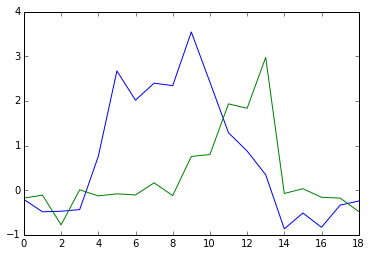

In [126]:
%matplotlib inline
x = df_composite['Time']
y = df_composite[['Serpina3g','Eif3s8']]
plt.plot(x,y)
# plt.plot(x,df_composite['Fech'])
# plt.plot(x,df_composite['Serpina3g'])
plt.show()

In [127]:
# for gene1 in psgenes_dict.keys():
geneAs = ['Serpina3g'] #,'KMO','CXCL3','IL6','MAMLD1','CCL4']
traces = []
for gene1 in geneAs:#psgenes_dict.keys():
    for gene2 in psgenes_dict[gene1]:
        xdata = df_composite[gene1]
        ydata = df_composite[gene2]
        traces.append(go.Scatter(x=xdata, y=ydata, mode='lines+markers', name='{}:{}'.format(gene1,gene2)))

plotly.offline.iplot(traces)

In [128]:
# Export data for selected genes to separate CSVs
merge_lists = lambda lst_a, lst_b: list(set(lst_a).union(set(lst_b)))
cols_for_export = merge_lists(psgenes_dict.keys(),['Time'])
for lst in psgenes_dict.values():
    cols_for_export = merge_lists(cols_for_export, lst)

training_data.ix[:,cols_for_export].to_csv("mouse_malaria_exported_data_training.csv", index=False)
test_data.ix[:,cols_for_export].to_csv("mouse_malaria_exported_data_test.csv", index=False)
#test_data.to_csv("human_monocyte_exported_data_test.csv")

In [129]:
def compute_distance(pt1, pt2):
    # Assuming that these pts. are lists of 2 numbers each
    dist = np.sqrt((pt1[0] - pt2[0])**2  +  (pt1[1] - pt2[1])**2)
    return dist

# For each individual's biggest gene pair loops, measure and report accuracy
def predict_accuracy(training_data, test_data, cols, verbose=False):
    K = 3 # Used to control number of neighbors used

    df1 = test_data
    df2 = training_data

    distances = {}
    mode_time = {}
    pred_list = []

    for ii in df1.index:
        pt1 = df1.ix[ii,cols].values
        dist_list = []
        # Compute distances to all training data
        for jj in df2.index:
            pt2 = df2.ix[jj,cols].values
            dist = compute_distance(pt1, pt2)
            # print 'Distance between {} and {}: {}'.format(pt1, pt2, dist)
            dist_list.append((jj, dist))

        distances[ii] = dist_list

        # Find the K nearest neighbors (set 3 since there are 3 different people in the training dataset)
        knn = list(zip(*sorted(dist_list, key = lambda row: row[1])[:K])[0])
        time_pts_for_knn = np.median(df2.ix[knn,'Time'].values)
        mode_time[ii] = time_pts_for_knn
        
    acc_count = 0
    time_acc_count = 0
    for ii in mode_time.keys():
        time_actual = test_data.ix[ii,'Time']
        time_pred = mode_time[ii]
        if verbose==True:
            print '{},{}'.format(time_actual, time_pred)
        pred_list.append(time_pred)
        if time_actual==time_pred:
            time_acc_count += 1
            
    return float(acc_count)/len(mode_time.keys()), float(time_acc_count)/len(mode_time.keys()), pred_list

In [130]:
def predict_accuracy_for_single_gene(training_data, test_data, gene, verbose='False'):
    K = 3
    df1 = test_data
    df2 = training_data
    
    distances = {}
    mode_time = {}
    pred_list = []

    for ii in df1.index:
        pt1 = df1.ix[ii,gene]
        dist_list = []
        # Compute distances to all training data
        for jj in df2.index:
            pt2 = df2.ix[jj,gene]
            dist = abs(pt2-pt1)
            # print 'Distance between {} and {}: {}'.format(pt1, pt2, dist)
            dist_list.append((jj, dist))

        distances[ii] = dist_list

        # Find the K nearest neighbors (set 3 since there are 3 different people in the training dataset)
        knn = list(zip(*sorted(dist_list, key = lambda row: row[1])[:K])[0])
        time_pts_for_knn = np.median(df2.ix[knn,'Time'].values)
        mode_time[ii] = time_pts_for_knn
        
    acc_count = 0
    time_acc_count = 0
    for ii in mode_time.keys():
        time_actual = test_data.ix[ii,'Time']
        time_pred = mode_time[ii]
        if verbose==True:
            print '{},{}'.format(time_actual, time_pred)
        pred_list.append(time_pred)
        if time_actual==time_pred:
            time_acc_count += 1
        else:
            print 'Actual, Predicted: {},{}'.format(time_actual, time_pred)
            
    return float(acc_count)/len(mode_time.keys()), float(time_acc_count)/len(mode_time.keys()), pred_list

In [36]:
# Compute accuracy on test data for each single gene using training data
gene_accuracy = pd.DataFrame(columns=['Gene','Accuracy'])
picked_acc_samples = []

for pair in gene_pairs:
    _, time_acc, pred_list = predict_accuracy_for_single_gene(training_data, test_data, pair[0])
    print 'For gene: {}, time accuracy: {}'.format(pair[0], time_acc)
    gene_accuracy.loc[len(gene_accuracy),:] = (pair[0], time_acc)
    picked_acc_samples.append(time_acc)
    
    _, time_acc, pred_list = predict_accuracy_for_single_gene(training_data, test_data, pair[1])
    print 'For gene: {}, time accuracy: {}'.format(pair[1], time_acc)
    gene_accuracy.loc[len(gene_accuracy),:] = (pair[1], time_acc)
    picked_acc_samples.append(time_acc)

Actual, Predicted: 2.0,14.0
Actual, Predicted: 2.5,14.0
Actual, Predicted: 3.0,4.0
Actual, Predicted: 3.5,3.0
Actual, Predicted: 14.0,2.5
Actual, Predicted: 48.0,24.0
Actual, Predicted: 48.0,24.0
Actual, Predicted: 48.0,24.0
For gene: IL1A, time accuracy: 0.75
Actual, Predicted: 2.0,0.0
Actual, Predicted: 2.5,0.0
Actual, Predicted: 3.0,48.0
Actual, Predicted: 3.5,48.0
Actual, Predicted: 4.0,24.0
Actual, Predicted: 4.0,24.0
Actual, Predicted: 4.0,24.0
Actual, Predicted: 4.0,24.0
Actual, Predicted: 4.0,24.0
Actual, Predicted: 14.0,4.0
Actual, Predicted: 24.0,48.0
Actual, Predicted: 24.0,4.0
For gene: MCOLN2, time accuracy: 0.625
Actual, Predicted: 2.0,14.0
Actual, Predicted: 2.5,14.0
Actual, Predicted: 3.0,4.0
Actual, Predicted: 3.5,3.0
Actual, Predicted: 14.0,2.5
Actual, Predicted: 48.0,24.0
Actual, Predicted: 48.0,24.0
Actual, Predicted: 48.0,24.0
For gene: IL1A, time accuracy: 0.75
Actual, Predicted: 0.0,2.0
Actual, Predicted: 0.0,2.0
Actual, Predicted: 2.0,0.0
Actual, Predicted: 2.0,

In [37]:
gene_pair_accuracy = pd.DataFrame(columns=['Gene_1','Gene_2','Accuracy'])

picked_acc_samples = []

# Compute accuracy on test data for each gene pair using training data
for pair in gene_pairs:
    _, time_acc, pred_list = predict_accuracy(training_data, test_data, list(pair))
    print 'For pair: {}, time accuracy: {}'.format(pair, time_acc)
    gene_pair_accuracy.loc[len(gene_pair_accuracy),:] = (pair[0], pair[1], time_acc)
    picked_acc_samples.append(time_acc)

For pair: ('IL1A', 'MCOLN2'), time accuracy: 0.84375
For pair: ('IL1A', 'TNIP3'), time accuracy: 0.9375
For pair: ('IL1A', 'IL7R'), time accuracy: 0.8125
For pair: ('IL1A', 'EBI3'), time accuracy: 0.90625
For pair: ('IL6', 'MCOLN2'), time accuracy: 0.78125
For pair: ('IL6', 'CD274'), time accuracy: 0.8125


In [38]:
# Randomized gene pair - baseline
random_gene_pairs = []
num_of_pairs = 50

for ii in range(0, num_of_pairs):
    idx_1 = int(np.random.rand()*training_data.shape[1])
    idx_2 = int(np.random.rand()*training_data.shape[1])
    random_gene_pairs.append((training_data.columns[idx_1], training_data.columns[idx_2]))

In [39]:
time_acc_samples = []
for pair in random_gene_pairs:
    _, time_acc, pred_list = predict_accuracy(training_data, test_data, list(pair))
    print 'For pair: {}, time accuracy: {}'.format(pair, time_acc)
    time_acc_samples.append(time_acc)

For pair: ('MMP13', 'SNX7'), time accuracy: 0.09375
For pair: ('PTGFR', 'LSM7'), time accuracy: 0.34375
For pair: ('ERCC8', 'AURKB'), time accuracy: 0.46875
For pair: ('AKR1C4', 'LRP2BP'), time accuracy: 0.09375
For pair: ('TRIP13', 'RHBDL2'), time accuracy: 0.34375
For pair: ('CLDN12', 'C6orf226'), time accuracy: 0.6875
For pair: ('SGCB', 'SULF1'), time accuracy: 0.375
For pair: ('TUBA1A', 'TDRD7'), time accuracy: 0.90625
For pair: ('NCRNA00115', 'SH3PXD2A'), time accuracy: 0.46875
For pair: ('CNIH2', 'CYP2B7P1'), time accuracy: 0.40625
For pair: ('LYZL4', 'SNORA72'), time accuracy: 0.34375
For pair: ('NISCH', 'PODNL1'), time accuracy: 0.4375
For pair: ('LOC731223', 'C16orf7'), time accuracy: 0.34375
For pair: ('RNF11', 'C16orf79'), time accuracy: 0.5
For pair: ('DHRS9', 'ADORA3'), time accuracy: 0.6875
For pair: ('FSCN2', 'MDP-1'), time accuracy: 0.59375
For pair: ('KIAA1467', 'CTSB'), time accuracy: 0.65625
For pair: ('DUOXA2', 'SERPINA10'), time accuracy: 0.25
For pair: ('WNT11', '

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:874: UserWarning:

axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.



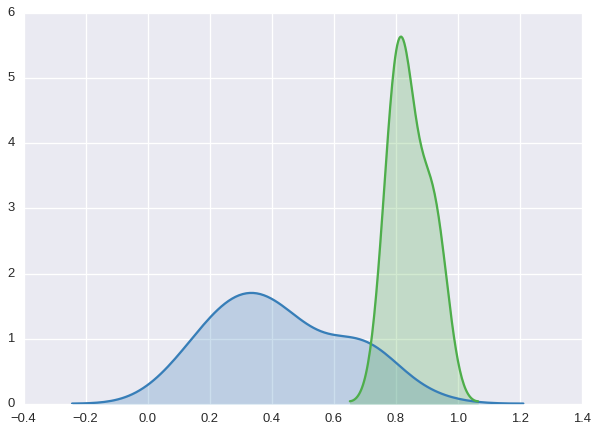

In [40]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.set_context("talk")
# with plt.style.context("fivethirtyeight"):
# #     sns.distplot(picked_acc_samples, bins=20)
_, c2, c3 = sns.color_palette("Set1", 3)
# sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
# sns.despine()
sns.kdeplot(np.array(time_acc_samples), shade=True, c=c2)
sns.kdeplot(np.array(picked_acc_samples), shade=True, c=c3)
plt.show()

In [41]:
from scipy.stats import ks_2samp
KSstat, KS_p_value = ks_2samp(time_acc_samples, picked_acc_samples)
print KSstat, KS_p_value

0.94 3.73924664056e-05
